In [82]:
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import sklearn
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)


In [4]:
data2=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col=0,na_values=' ')

In [5]:
data2_cont=['tenure','MonthlyCharges','TotalCharges']
tgt=['Churn']

In [48]:
data2[tgt]=data2[tgt].replace('Yes',1).copy()
data2[tgt]=data2[tgt].replace('No',0).copy()
# data2.info()

# Task 2.1

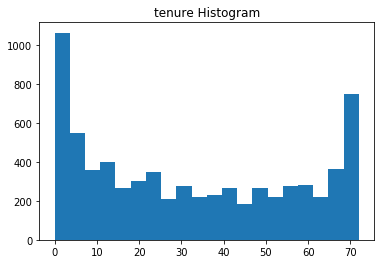

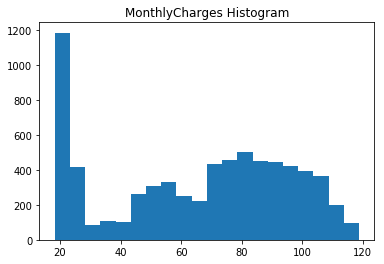

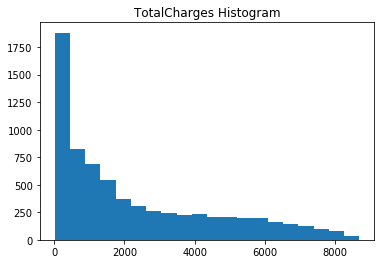

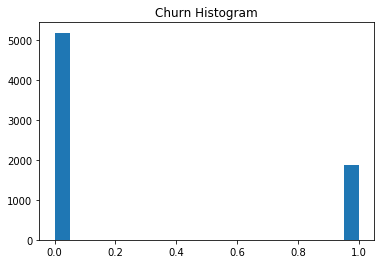

In [9]:
for uvt in ['tenure','MonthlyCharges','TotalCharges','Churn']:
#     print(uvt)

    data=[x for x in list(data2[uvt].values) if not np.isnan(float(x))]
    plt.hist(data,bins=20)
    plt.title(uvt+' Histogram')
    plt.show()


# Task 2.2

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data2[data2.columns[:-1]].values,
                                                    data2[data2.columns[-1]].values)


In [11]:
data2_contidx=[list(data2.columns).index(ele) for ele in data2_cont]
data2_contidx2=[0,1,2]
data2_catidx=[int(str(x)) for x in np.arange(3,19)]


In [83]:
preprocess_ipt=make_column_transformer((SimpleImputer(strategy='median'),data2_contidx),remainder='passthrough')
preprocess_std=make_column_transformer((StandardScaler(),data2_contidx2),remainder='passthrough',sparse_threshold=0)
preprocess_ohc=make_column_transformer((OneHotEncoder(categories='auto',handle_unknown='ignore'),data2_catidx),
                                       remainder='passthrough')

model_ls=[LogisticRegression(),LinearSVC(),NearestCentroid()]                    
for md in model_ls:
    model=Pipeline(steps=[('1',preprocess_ipt),('2',preprocess_std),('3',preprocess_ohc),('4',md)])
    print('With standardScaler, the model ',str(md),'has an average training accuracy of',
          np.mean(cross_val_score(model,X_train,y_train)))

With standardScaler, the model  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) has an average training accuracy of 0.8017801524615834
With standardScaler, the model  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) has an average training accuracy of 0.799508178032454
With standardScaler, the model  NearestCentroid(metric='euclidean', shrink_threshold=None) has an average training accuracy of 0.7364630117185484


With scaling and use default parameters, LogisticRegression has an average training accuracy of 0.80, LinearSVC has an average training accuracy of 0.80 and NearestCentorid has an average training accuracy of 0.73

In [84]:
for md in model_ls:
    model=Pipeline(steps=[('1',preprocess_ipt),('3',preprocess_ohc),('4',md)])
    print('With standardScaler, the model ',str(md),'has an average training accuracy of',
          np.mean(cross_val_score(model,X_train,y_train)))

With standardScaler, the model  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) has an average training accuracy of 0.8008335054118699
With standardScaler, the model  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) has an average training accuracy of 0.6397437965687539
With standardScaler, the model  NearestCentroid(metric='euclidean', shrink_threshold=None) has an average training accuracy of 0.5166606439178841


Without scaling and use default parameters, LogisticRegression has an average training accuracy of 0.80, LinearSVC has an average training accuracy of 0.39 and NearestCentorid has an average training accuracy of 0.51.
Therefore, we can see that scaling really improves the result of LinearSVC and NearestCentorid. In the scaled case, both logistic regression and linearSVC have the highest accuracy of 0.8.

# Task 2.3

In [85]:
param_grid = {'logit__C': np.logspace(-2, 1, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('logit',LogisticRegression())])
search_logit = GridSearchCV(preprocess_iso, param_grid, iid=False, cv=2,
                      return_train_score=False)
search_logit.fit(X_train, y_train)
print(search_logit.best_params_)

param_grid = {'svc__C': np.logspace(-2, 1, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('svc',LinearSVC())])
search_svc = GridSearchCV(preprocess_iso, param_grid, iid=False, cv=2,
                      return_train_score=False)
search_svc.fit(X_train, y_train)
print(search_svc.best_params_)


param_grid = {'near__metric': ['euclidean','manhattan'],'near__shrink_threshold':np.logspace(-2, 2, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('near',NearestCentroid())])
search_near = GridSearchCV(preprocess_iso, param_grid, iid=False, cv=2,
                      return_train_score=False)
search_near.fit(X_train, y_train)
print(search_near.best_params_)







{'logit__C': 0.021544346900318832}
{'svc__C': 0.021544346900318832}
{'near__metric': 'manhattan', 'near__shrink_threshold': 4.6415888336127775}


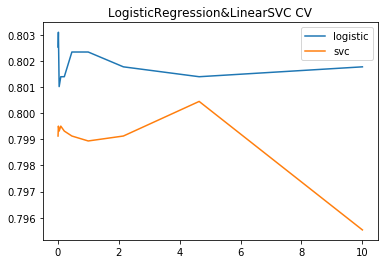

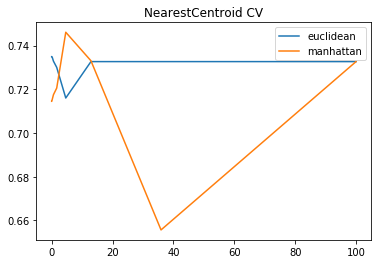

In [78]:
para_logit=search_logit.cv_results_['param_logit__C'].data
score_ls=search_logit.cv_results_['mean_test_score']
plt.plot(para_logit,score_ls,label='logistic')
para_svc=search_svc.cv_results_['param_svc__C'].data
score_ls=search_svc.cv_results_['mean_test_score']
plt.plot(para_svc,score_ls,label='svc')
plt.title('LogisticRegression&LinearSVC CV')

plt.legend()
plt.show()


para_near=search_near.cv_results_['param_near__shrink_threshold'].data[:10]
score_ls=search_near.cv_results_['mean_test_score'][:10]
plt.plot(para_near,score_ls,label='euclidean')

para_near=search_near.cv_results_['param_near__shrink_threshold'].data[10:]
score_ls=search_near.cv_results_['mean_test_score'][10:]
plt.plot(para_near,score_ls,label='manhattan')
plt.title('NearestCentroid CV')
plt.legend()
plt.show()


For LinearSVC and LogisticRegression, the accuracy does not improve much after tuning the parameter. It only increases from 0.80 to 0.803. For Nearest Centroid, if we use manhattan distance and shrinkage $\approx 4.6$, the best accuracy is around 0.75 which is a slight improvement 

# Task 2.4

#### If we change cv to kfold with shuffling, here's result

In [86]:
param_grid = {'logit__C': np.logspace(-2, 1, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('logit',LogisticRegression())])
search_logit = GridSearchCV(preprocess_iso, param_grid, iid=False,cv=ShuffleSplit(n_splits=5,test_size=0.2,
                                                                                  random_state=100),
                      return_train_score=False)
search_logit.fit(X_train, y_train)
print(search_logit.best_params_)

param_grid = {'svc__C': np.logspace(-2, 1, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('svc',LinearSVC())])
search_svc = GridSearchCV(preprocess_iso, param_grid, iid=False, cv=ShuffleSplit(n_splits=5,test_size=0.2,
                                                                                 random_state=100),
                      return_train_score=False)
search_svc.fit(X_train, y_train)
print(search_svc.best_params_)


param_grid = {'near__metric': ['euclidean','manhattan'],'near__shrink_threshold':np.logspace(-2, 2, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('near',NearestCentroid())])
search_near = GridSearchCV(preprocess_iso, param_grid, iid=False, 
                      return_train_score=False,cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=100))
search_near.fit(X_train, y_train)
print(search_near.best_params_)







{'logit__C': 4.6415888336127775}
{'svc__C': 4.6415888336127775}
{'near__metric': 'manhattan', 'near__shrink_threshold': 12.915496650148826}


The best parameter for logisticregression and LinearSVC changes from 0.021 to 4.64, and the shrink_threshold in nearestCentroid changes to 12.915496650148826. Also, the parameter graph becomes different. The maximum accuracy in the graph for Logistic Regression increases a little to 0.806 and the maximum accuracy in LinearSVC increases to 0.802.

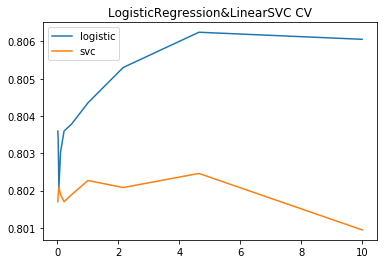

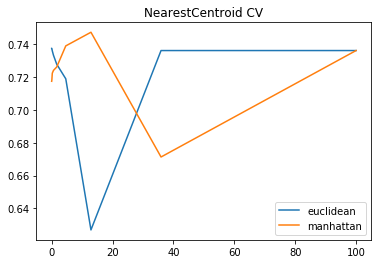

In [87]:
para_logit=search_logit.cv_results_['param_logit__C'].data
score_ls=search_logit.cv_results_['mean_test_score']
plt.plot(para_logit,score_ls,label='logistic')
para_svc=search_svc.cv_results_['param_svc__C'].data
score_ls=search_svc.cv_results_['mean_test_score']
plt.plot(para_svc,score_ls,label='svc')
plt.title('LogisticRegression&LinearSVC CV')

plt.legend()
plt.show()
para_near=search_near.cv_results_['param_near__shrink_threshold'].data[:10]
score_ls=search_near.cv_results_['mean_test_score'][:10]

plt.plot(para_near,score_ls,label='euclidean')

para_near=search_near.cv_results_['param_near__shrink_threshold'].data[10:]
score_ls=search_near.cv_results_['mean_test_score'][10:]
plt.plot(para_near,score_ls,label='manhattan')
plt.title('NearestCentroid CV')
plt.legend()
plt.show()

#### If we change the random state, here's the result

In [88]:
param_grid = {'logit__C': np.logspace(-2, 1, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('logit',LogisticRegression())])
search_logit = GridSearchCV(preprocess_iso, param_grid, iid=False,cv=ShuffleSplit(n_splits=5,test_size=0.2,
                                                                                  random_state=10),
                      return_train_score=False)
search_logit.fit(X_train, y_train)
print(search_logit.best_params_)

param_grid = {'svc__C': np.logspace(-2, 1, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('svc',LinearSVC())])
search_svc = GridSearchCV(preprocess_iso, param_grid, iid=False, cv=ShuffleSplit(n_splits=5,test_size=0.2,
                                                                                 random_state=10),
                      return_train_score=False)
search_svc.fit(X_train, y_train)
print(search_svc.best_params_)


param_grid = {'near__metric': ['euclidean','manhattan'],'near__shrink_threshold':np.logspace(-2, 2, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),
                               ('near',NearestCentroid())])
search_near = GridSearchCV(preprocess_iso, param_grid, iid=False, 
                      return_train_score=False,cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10))
search_near.fit(X_train, y_train)
print(search_near.best_params_)







{'logit__C': 4.6415888336127775}
{'svc__C': 0.21544346900318834}
{'near__metric': 'manhattan', 'near__shrink_threshold': 12.915496650148826}


The best parameter for linearSVC changes back to 0.21, all other parameters remain the same. Also, the parameter graph becomes different. The maximum accuracy for logistic regression increases to  0.8115 and the maximum accuracy for Linear SVM increases to 0.8105. The best accuracy for NearestCentroid also slightly increases.

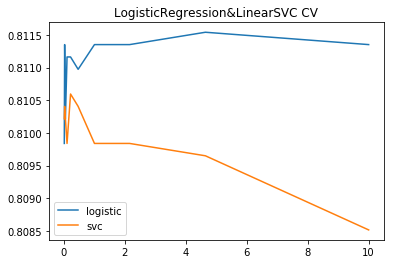

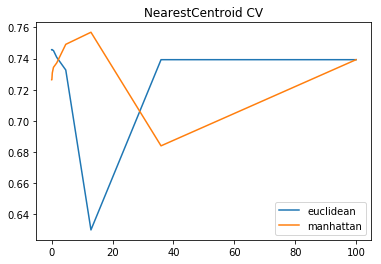

In [89]:
para_logit=search_logit.cv_results_['param_logit__C'].data
score_ls=search_logit.cv_results_['mean_test_score']
plt.plot(para_logit,score_ls,label='logistic')
para_svc=search_svc.cv_results_['param_svc__C'].data
score_ls=search_svc.cv_results_['mean_test_score']
plt.plot(para_svc,score_ls,label='svc')
plt.title('LogisticRegression&LinearSVC CV')

plt.legend()
plt.show()
para_near=search_near.cv_results_['param_near__shrink_threshold'].data[:10]
score_ls=search_near.cv_results_['mean_test_score'][:10]

plt.plot(para_near,score_ls,label='euclidean')

para_near=search_near.cv_results_['param_near__shrink_threshold'].data[10:]
score_ls=search_near.cv_results_['mean_test_score'][10:]
plt.plot(para_near,score_ls,label='manhattan')
plt.title('NearestCentroid CV')
plt.legend()
plt.show()

# Task 2.5

In [43]:
cat_fn=search_logit.best_estimator_.steps[2][1].named_transformers_['onehotencoder'].get_feature_names()
cot_fn=['tenure','MonthlyCharges','TotalCharges']
all_fn=list(cat_fn)+list(cot_fn)

In [45]:
logit_coef = search_logit.best_estimator_.named_steps['logit'].coef_
svc_coef = search_svc.best_estimator_.named_steps['svc'].coef_

### This is the graph for all coefficients

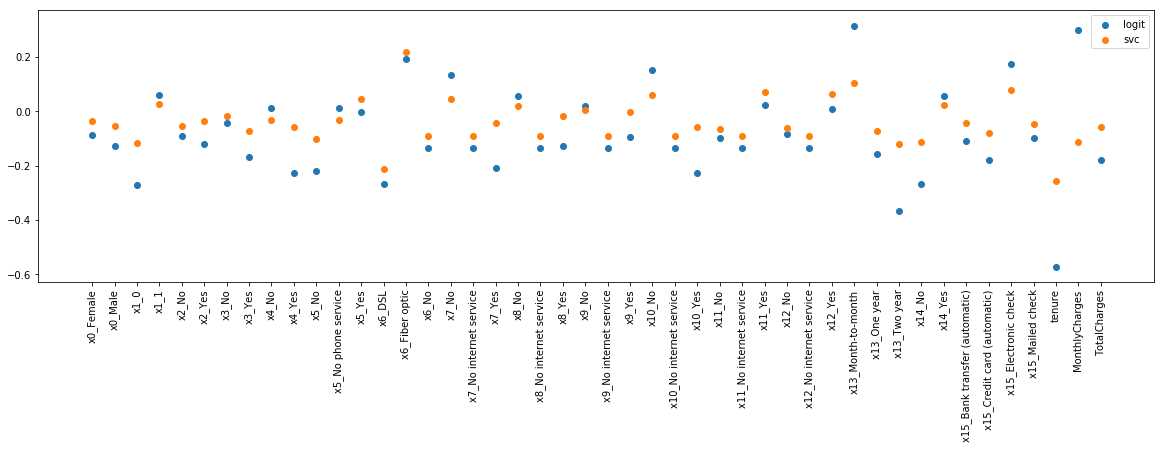

In [47]:
plt.figure(figsize=(20,5))
plt.scatter(all_fn,logit_coef,label='logit')
plt.scatter(all_fn,svc_coef,label='svc')
plt.xticks(rotation=90)

plt.legend()